In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Fix the path construction - use forward slashes or raw strings
import os

# Method 1: Use forward slashes (recommended)
path = os.path.abspath(os.path.join("..", "04_S&P500_quant_analysis", "01_data", "^spx_d.csv"))

# Alternative Method 2: Use raw string
# path = os.path.abspath(os.path.join("..", r"04_S&P500_quant_analysis\01_data", "^spx_d.csv"))

# Alternative Method 3: Use pathlib (modern approach)
# from pathlib import Path
# path = Path("..") / "04_S&P500_quant_analysis" / "01_data" / "^spx_d.csv"
print(f"Path exists: {os.path.exists(path)}")

# Read the CSV file
df = pd.read_csv(path)

# lower case column names for easier access
df.columns = [col.lower() for col in df.columns]

# Set the 'date' column as the index and convert it to datetime
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Show the first few rows of the dataframe
df.head()

Path exists: True


,open,high,low,close,volume
date,,,,,
1789-05-01,0.51,0.51,0.51,0.51,0.0
1789-06-01,0.51,0.51,0.51,0.51,0.0
1789-07-01,0.50,0.50,0.50,0.50,0.0
1789-08-01,0.50,0.51,0.50,0.51,0.0
1789-09-01,0.51,0.51,0.50,0.51,0.0


In [2]:
# filter DatetimeIndex higher than year 1957
df = df[df.index > '1957-01-01']

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17355 entries, 1957-01-02 to 2025-12-12
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    17355 non-null  float64
 1   high    17355 non-null  float64
 2   low     17355 non-null  float64
 3   close   17355 non-null  float64
 4   volume  17355 non-null  float64
dtypes: float64(5)
memory usage: 813.5 KB


In [3]:
df.shape

(17355, 5)

In [4]:
# # plot close prices over time
# plt.figure(figsize=(14, 7))
# plt.plot(df.index, df['close'], label='Close Price')
# plt.title('S&P 500 Close Prices Over Time')
# plt.xlabel('Date')
# plt.ylabel('Close Price')
# plt.legend()
# plt.grid()
# plt.show()

In [5]:
# keep close column only
df = df[['close']]

# calculate daily returns
df['daily_return'] = df['close'].pct_change()

# fill NaN values
df.fillna(0, inplace=True)

df.head()

,close,daily_return
date,,
1957-01-02,46.20,0.000000
1957-01-03,46.60,0.008658
1957-01-04,46.66,0.001288
1957-01-07,46.42,-0.005144
1957-01-08,46.25,-0.003662


In [6]:
"""
Corrections analysis:

1) Number of negative daily returns between minus 1% and minus 2% per year and month
2) Number of negative daily returns between minus 2% and minus 3% per year and month
3) Number of negative daily returns between minus 3% and minus 5% per year and month
4) Number of negative daily returns between minus 5% and minus 10% per year and month
5) Number of negative daily returns between minus 10% and minus 15% per year and month
6) Number of negative daily returns between minus 15% and minus 20% per year and month
7) Number of negative daily returns between minus 20% and minus 30% per year and month
8) Number of negative daily returns greater than minus 30% per year and month

For each of the above categories, will be created a column in the dataframe with signal 1 when the condition is met, 
0 otherwise.

Then, will be created a pivot table with years as index, months as columns, and sum of occurrences as values.
""";

# define the bins and labels
bins = [-np.inf, -0.30, -0.20, -0.15, -0.10, -0.05, -0.03, -0.02, -0.01, 0]
labels = ['over_-30%', '-20%_to_-30%', '-15%_to_-20%', '-10%_to_-15%', '-5%_to_-10%', '-3%_to_-5%', '-2%_to_-3%', '-1%_to_-2%', '0%_to_-1%']

# create a new column 'correction_category' based on the bins
df['correction_category'] = pd.cut(df['daily_return'], bins=bins, labels=labels)

df.head()

,close,daily_return,correction_category
date,,,
1957-01-02,46.20,0.000000,0%_to_-1%
1957-01-03,46.60,0.008658,NaN
1957-01-04,46.66,0.001288,NaN
1957-01-07,46.42,-0.005144,0%_to_-1%
1957-01-08,46.25,-0.003662,0%_to_-1%


In [7]:
# group by year, month and correction_category, then count occurrences
correction_counts = df.groupby([df.index.year, df.index.month, 'correction_category']).size().unstack(fill_value=0)

correction_counts.index.names = ['Year', 'Month']

correction_counts.head()

correction_category  over_-30%  -20%_to_-30%  -15%_to_-20%  -10%_to_-15%  \
Year Month                                                                 
1957 1                       0             0             0             0   
     2                       0             0             0             0   
     3                       0             0             0             0   
     4                       0             0             0             0   
     5                       0             0             0             0   

correction_category  -5%_to_-10%  -3%_to_-5%  -2%_to_-3%  -1%_to_-2%  \
Year Month                                                             
1957 1                         0           0           0           2   
     2                         0           0           0           2   
     3                         0           0           0           0   
     4                         0           0           0           0   
     5                         0           0           0           0   

correction_category  0%_to_-1%  
Year Month                      
1957 1                      11  
     2                      12  
     3                       9  
     4                       7  
     5                       8

In [8]:
correction_counts.tail(12)

correction_category  over_-30%  -20%_to_-30%  -15%_to_-20%  -10%_to_-15%  \
Year Month                                                                 
2025 1                       0             0             0             0   
     2                       0             0             0             0   
     3                       0             0             0             0   
     4                       0             0             0             0   
     5                       0             0             0             0   
     6                       0             0             0             0   
     7                       0             0             0             0   
     8                       0             0             0             0   
     9                       0             0             0             0   
     10                      0             0             0             0   
     11                      0             0             0             0   
     12                      0             0             0             0   

correction_category  -5%_to_-10%  -3%_to_-5%  -2%_to_-3%  -1%_to_-2%  \
Year Month                                                             
2025 1                         0           0           0           3   
     2                         0           0           0           2   
     3                         0           0           1           7   
     4                         1           2           2           1   
     5                         0           0           0           1   
     6                         0           0           0           1   
     7                         0           0           0           0   
     8                         0           0           0           1   
     9                         0           0           0           0   
     10                        0           0           1           0   
     11                        0           0           0           4   
     12                        0           0           0           1   

correction_category  0%_to_-1%  
Year Month                      
2025 1                       5  
     2                       7  
     3                       3  
     4                       2  
     5                       8  
     6                       6  
     7                       9  
     8                      10  
     9                       8  
     10                      7  
     11                      3  
     12                      3

In [9]:
# # download the dataframe as csv
# correction_counts.to_csv('correction_counts_per_year_month.csv')

In [10]:
# group by year and sum occurrences
yearly_correction_counts = correction_counts.groupby(level='Year').sum()

yearly_correction_counts.head()

correction_category,over_-30%,-20%_to_-30%,-15%_to_-20%,-10%_to_-15%,-5%_to_-10%,-3%_to_-5%,-2%_to_-3%,-1%_to_-2%,0%_to_-1%
Year,,,,,,,,,
1957,0,0,0,0,0,0,5,18,111
1958,0,0,0,0,0,0,0,6,91
1959,0,0,0,0,0,0,1,13,103
1960,0,0,0,0,0,0,1,15,114
1961,0,0,0,0,0,1,1,5,95


In [11]:
yearly_correction_counts.tail(10)

correction_category,over_-30%,-20%_to_-30%,-15%_to_-20%,-10%_to_-15%,-5%_to_-10%,-3%_to_-5%,-2%_to_-3%,-1%_to_-2%,0%_to_-1%
Year,,,,,,,,,
2016,0,0,0,0,0,1,4,17,99
2017,0,0,0,0,0,0,0,4,104
2018,0,0,0,0,0,5,10,17,87
2019,0,0,0,0,0,0,5,10,87
2020,0,0,0,1,4,11,9,20,63
2021,0,0,0,0,0,0,5,16,88
2022,0,0,0,0,0,8,15,40,80
2023,0,0,0,0,0,0,1,27,85
2024,0,0,0,0,0,0,4,15,90


In [12]:
# calculate the average number of occurrences per year for each correction category
average_corrections_per_year = yearly_correction_counts.mean()

average_corrections_per_year.head()

correction_category
over_-30%       0.000000
-20%_to_-30%    0.014493
-15%_to_-20%    0.000000
-10%_to_-15%    0.014493
-5%_to_-10%     0.376812
dtype: float64

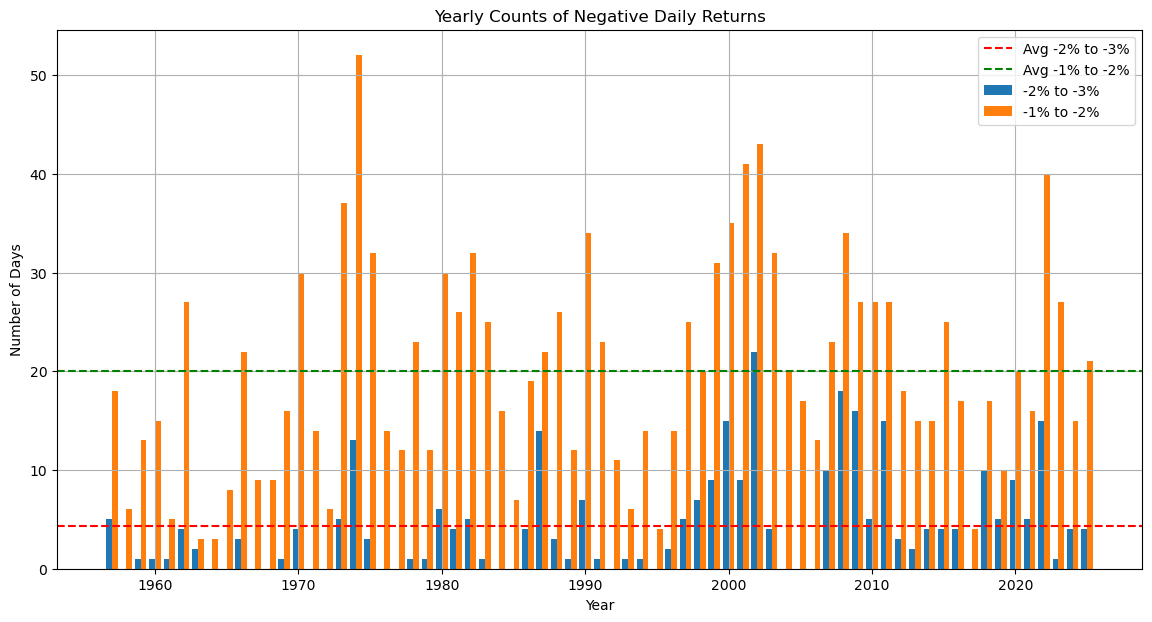

In [13]:
# plot -2%_to_-3%, -1%_to_-2% as bars for every year and their average as a line
plt.figure(figsize=(14, 7))
plt.bar(yearly_correction_counts.index - 0.2, yearly_correction_counts['-2%_to_-3%'], width=0.4, label='-2% to -3%')
plt.bar(yearly_correction_counts.index + 0.2, yearly_correction_counts['-1%_to_-2%'], width=0.4, label='-1% to -2%')
plt.axhline(y=average_corrections_per_year['-2%_to_-3%'], color='r', linestyle='--', label='Avg -2% to -3%')
plt.axhline(y=average_corrections_per_year['-1%_to_-2%'], color='g', linestyle='--', label='Avg -1% to -2%')
plt.title('Yearly Counts of Negative Daily Returns')
plt.xlabel('Year')
plt.ylabel('Number of Days')
plt.legend()
plt.grid()
plt.show()

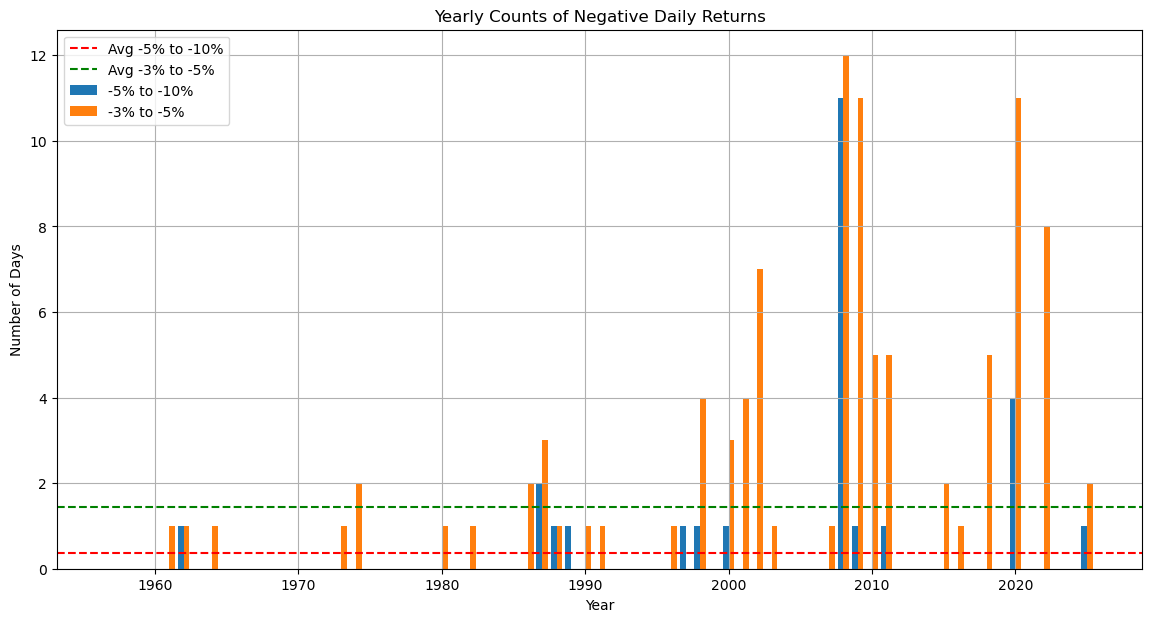

In [14]:
# plot -5%_to_-10%,	-3%_to_-5% as bars for every year and their average as a line
plt.figure(figsize=(14, 7))
plt.bar(yearly_correction_counts.index - 0.2, yearly_correction_counts['-5%_to_-10%'], width=0.4, label='-5% to -10%')
plt.bar(yearly_correction_counts.index + 0.2, yearly_correction_counts['-3%_to_-5%'], width=0.4, label='-3% to -5%')
plt.axhline(y=average_corrections_per_year['-5%_to_-10%'], color='r', linestyle='--', label='Avg -5% to -10%')
plt.axhline(y=average_corrections_per_year['-3%_to_-5%'], color='g', linestyle='--', label='Avg -3% to -5%')
plt.title('Yearly Counts of Negative Daily Returns')
plt.xlabel('Year')
plt.ylabel('Number of Days')
plt.legend()
plt.grid()
plt.show()

In [15]:
daily_df = df.copy()
daily_df.head()

,close,daily_return,correction_category
date,,,
1957-01-02,46.20,0.000000,0%_to_-1%
1957-01-03,46.60,0.008658,NaN
1957-01-04,46.66,0.001288,NaN
1957-01-07,46.42,-0.005144,0%_to_-1%
1957-01-08,46.25,-0.003662,0%_to_-1%


In [16]:
# drop correction_category = nan
daily_df = daily_df.dropna(subset=['correction_category'])

# add column {labels}_day_after shifting 'correction_category' by 1 when the condition is met
for label in labels:
    daily_df[f'{label}_day_after'] = (daily_df['correction_category'] == label).astype(int).shift(1)

In [17]:
daily_df.head()

,close,daily_return,correction_category,over_-30%_day_after,-20%_to_-30%_day_after,-15%_to_-20%_day_after,-10%_to_-15%_day_after,-5%_to_-10%_day_after,-3%_to_-5%_day_after,-2%_to_-3%_day_after,-1%_to_-2%_day_after,0%_to_-1%_day_after
date,,,,,,,,,,,,
1957-01-02,46.20,0.000000,0%_to_-1%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1957-01-07,46.42,-0.005144,0%_to_-1%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1957-01-08,46.25,-0.003662,0%_to_-1%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1957-01-09,46.16,-0.001946,0%_to_-1%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1957-01-11,46.18,-0.001945,0%_to_-1%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
# print the count of each new column
for label in labels:
    print(f"{label}_day_after count: {daily_df[f'{label}_day_after'].sum()}")

over_-30%_day_after count: 0.0
-20%_to_-30%_day_after count: 1.0
-15%_to_-20%_day_after count: 0.0
-10%_to_-15%_day_after count: 1.0
-5%_to_-10%_day_after count: 26.0
-3%_to_-5%_day_after count: 99.0
-2%_to_-3%_day_after count: 300.0
-1%_to_-2%_day_after count: 1381.0
0%_to_-1%_day_after count: 6341.0


In [19]:
# for every label, calculate the average return
for label in labels:
    avg_return = daily_df.loc[daily_df[f'{label}_day_after'] == 1, 'daily_return'].mean()
    print(f"Average daily return after {label} one day correction: {avg_return:.4%}")

Average daily return after over_-30% one day correction: nan%
Average daily return after -20%_to_-30% one day correction: -3.9206%
Average daily return after -15%_to_-20% one day correction: nan%
Average daily return after -10%_to_-15% one day correction: -5.1831%
Average daily return after -5%_to_-10% one day correction: -3.4384%
Average daily return after -3%_to_-5% one day correction: -1.6168%
Average daily return after -2%_to_-3% one day correction: -1.1878%
Average daily return after -1%_to_-2% one day correction: -0.8354%
Average daily return after 0%_to_-1% one day correction: -0.6057%


In [20]:
# print head of daily_df columns, daily_return,	correction_category, -20%_to_-30 %_day_after and -10%_to_-15%_day_after
check = daily_df.copy()
check.head()

,close,daily_return,correction_category,over_-30%_day_after,-20%_to_-30%_day_after,-15%_to_-20%_day_after,-10%_to_-15%_day_after,-5%_to_-10%_day_after,-3%_to_-5%_day_after,-2%_to_-3%_day_after,-1%_to_-2%_day_after,0%_to_-1%_day_after
date,,,,,,,,,,,,
1957-01-02,46.20,0.000000,0%_to_-1%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1957-01-07,46.42,-0.005144,0%_to_-1%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1957-01-08,46.25,-0.003662,0%_to_-1%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1957-01-09,46.16,-0.001946,0%_to_-1%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1957-01-11,46.18,-0.001945,0%_to_-1%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [21]:
# filter check where -20%_to_-30%_day_after == 1
check2 = check[check['-20%_to_-30%_day_after'] == 1]
check2.head()

,close,daily_return,correction_category,over_-30%_day_after,-20%_to_-30%_day_after,-15%_to_-20%_day_after,-10%_to_-15%_day_after,-5%_to_-10%_day_after,-3%_to_-5%_day_after,-2%_to_-3%_day_after,-1%_to_-2%_day_after,0%_to_-1%_day_after
date,,,,,,,,,,,,
1987-10-22,248.25,-0.039206,-3%_to_-5%,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# Verify: show the day BEFORE each row in check2 (should have correction_category = '-20%_to_-30%')
check2_dates = check2.index
for date in check2_dates:
    # Get the previous trading day
    prev_idx = daily_df.index.get_loc(date) - 1
    prev_date = daily_df.index[prev_idx]
    print(f"Current date: {date}, Previous date: {prev_date}")
    print(f"Previous day data:\n{daily_df.loc[prev_date, ['daily_return', 'correction_category']]}\n")

Current date: 1987-10-22 00:00:00, Previous date: 1987-10-19 00:00:00
Previous day data:
daily_return              -0.204669
correction_category    -20%_to_-30%
Name: 1987-10-19 00:00:00, dtype: object



In [23]:
# filter check where -10%_to_-15%_day_after == 1
check3 = check[check['-10%_to_-15%_day_after'] == 1]
check3.head()

,close,daily_return,correction_category,over_-30%_day_after,-20%_to_-30%_day_after,-15%_to_-20%_day_after,-10%_to_-15%_day_after,-5%_to_-10%_day_after,-3%_to_-5%_day_after,-2%_to_-3%_day_after,-1%_to_-2%_day_after,0%_to_-1%_day_after
date,,,,,,,,,,,,
2020-03-18,2398.1,-0.051831,-5%_to_-10%,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# Verify: show the day BEFORE each row in check3 (should have correction_category = '-10%_to_-15%')
check3_dates = check3.index
for date in check3_dates:
    # Get the previous trading day
    prev_idx = daily_df.index.get_loc(date) - 1
    prev_date = daily_df.index[prev_idx]
    print(f"Current date: {date}, Previous date: {prev_date}")
    print(f"Previous day data:\n{daily_df.loc[prev_date, ['daily_return', 'correction_category']]}\n")

Current date: 2020-03-18 00:00:00, Previous date: 2020-03-16 00:00:00
Previous day data:
daily_return              -0.119841
correction_category    -10%_to_-15%
Name: 2020-03-16 00:00:00, dtype: object



In [25]:
# values cross check for column daily_df['-10%_to_-15%_day_after'] = 1
check_values = daily_df[daily_df['-10%_to_-15%_day_after'] == 1][['daily_return', 'correction_category']]
check_values.head()

,daily_return,correction_category
date,,
2020-03-18,-0.051831,-5%_to_-10%


In [26]:
# values cross check for column daily_df['-20%_to_-30%_day_after'] = 1
check_values2 = daily_df[daily_df['-20%_to_-30%_day_after'] == 1][['daily_return', 'correction_category']]
check_values2.head()

,daily_return,correction_category
date,,
1987-10-22,-0.039206,-3%_to_-5%
